In [5]:
from scattnlay import scattnlay, fieldnlay
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [6]:
help(scattnlay)

Help on function scattnlay in module scattnlay.main:

scattnlay(x, m, theta=array([], dtype=float64), nmax=-1, pl=-1, mp=False)
    scattnlay(x, m[, theta, nmax, pl, mp])
    
    Calculate the actual scattering parameters and amplitudes.
    
        x: Size parameters (1D or 2D ndarray)
        m: Relative refractive indices (1D or 2D ndarray)
        theta: Scattering angles where the scattering amplitudes will be
               calculated (optional, 1D ndarray)
        nmax: Maximum number of multipolar expansion terms to be used for the
              calculations. Only use it if you know what you are doing.
        pl: Index of PEC layer. If there is none just send -1.
        mp: Use multiple (True) or double (False) precision.
    
    Returns: (terms, Qext, Qsca, Qabs, Qbk, Qpr, g, Albedo, S1, S2)
    with
        terms: Number of multipolar expansion terms used for the calculations
        Qext: Efficiency factor for extinction
        Qsca: Efficiency factor for scattering
  

In [74]:
# wrap scattnlay and integrate

def x_size_param(d, wavelength):
    return d*np.pi/wavelength

def droplet_scatteirng_amplitudes(x, theta): # water
    m = np.array([1.33 + 0.0j], dtype = np.complex128)
    terms, Qext, Qsca, Qabs, Qbk, Qpr, g, Albedo, S1, S2 = scattnlay(x, m, theta)
    return S1, S2

def droplet_scatteirng_effciency(x, theta): # water
    m = np.array([1.33 + 0.0j], dtype = np.complex128)
    terms, Qext, Qsca, Qabs, Qbk, Qpr, g, Albedo, S1, S2 = scattnlay(x, m, theta)
    return Qsca

def phase_function(S1, S2): # unpolarised light
    return 0.5*(abs(S1)**2+abs(S2)**2)

def solid_angle_normalisation(y, theta): # integrate y over polar and azimuthal angles
    N = np.trapz(y*np.sin(theta), theta)*2*np.pi
    return y/N

def relative_irradiances(x, theta): # arbitraty units
    S1, S2 = droplet_scatteirng_amplitudes(x, theta)
    return phase_function(S1, S2)


def solid_angle_scattered_irradiance(x, theta, theta1, theta2): # integrate irradiances over solid angle from theta1 to theta2
    rel_irr = relative_irradiances(x, theta) # get irradiances
    (ind1, theta1) = min(enumerate(theta), key=lambda x: abs(theta1 - x[1])) # find closest matching polar angle range
    (ind2, theta2) = min(enumerate(theta), key=lambda x: abs(theta2 - x[1]))
    irr_range = rel_irr[ind1:ind2+1] # integrate over range
    theta_range = theta[ind1:ind2+1]
    return np.trapz(irr_range*np.sin(theta_range), theta_range )*2*np.pi 

In [51]:
# generate array of size parameters
min_um, max_um, step = 1, 50, 0.1 
wavelength = 632.8e-9 # FSSP

droplet_sizes = np.arange(min_um*10**-6, max_um*10**-6, step*10**-6) 
droplet_x_iter = map(lambda d: np.array([x_size_param(d, wavelength)]), droplet_sizes)
droplet_x = list(deepcopy(droplet_x_iter))

In [81]:
# generate polar angle array (phase function resolution)
deg_step = 0.5
theta = np.arange(0, np.pi, np.radians(deg_step))

validation 1 – scattnlay reporduces BH plot for x = 3

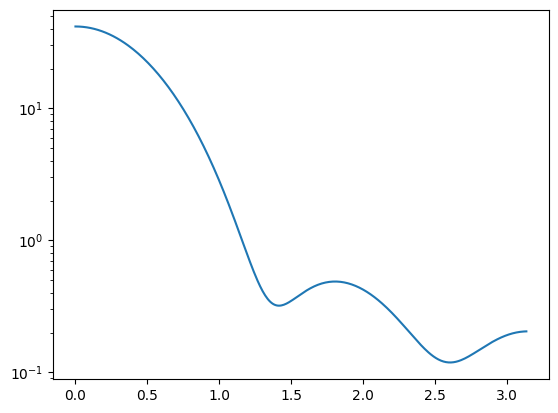

In [82]:
irr = relative_irradiances(np.array([3]), theta)
plt.yscale("log")
plt.plot(theta, irr)

validation 2 – scattnlay reproduces extinction paradox over size parameter range

In [83]:
scat_eff_iter = map(lambda x: droplet_scatteirng_effciency(x, theta), droplet_x)
scat_eff = list(scat_eff_iter)

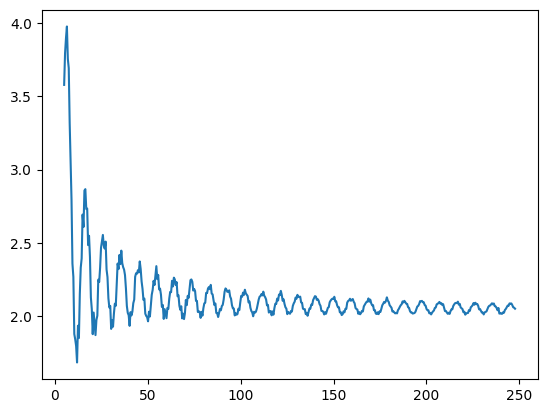

In [84]:
plt.plot(droplet_x,scat_eff)

validation 3 – reponse curve for FSSP

In [125]:
theta1_deg, theta2_deg  = 4.6, 12.8 # FSSP
wavelength = 632.8e-9 # FSSP
min_um, max_um, step = 1, 50, 0.1
deg_step = 0.5

theta = np.arange(0, np.pi, np.radians(deg_step))
droplet_sizes = np.arange(min_um*10**-6, max_um*10**-6, step*10**-6) 
droplet_x_iter = map(lambda d: np.array([x_size_param(d, wavelength)]), droplet_sizes)
droplet_x = list(deepcopy(droplet_x_iter))
scat_irr_iter = map(lambda x: solid_angle_scattered_irradiance(x, theta, np.radians(theta1_deg), np.radians(theta2_deg)), droplet_x)
scat_irr = list(scat_irr_iter)

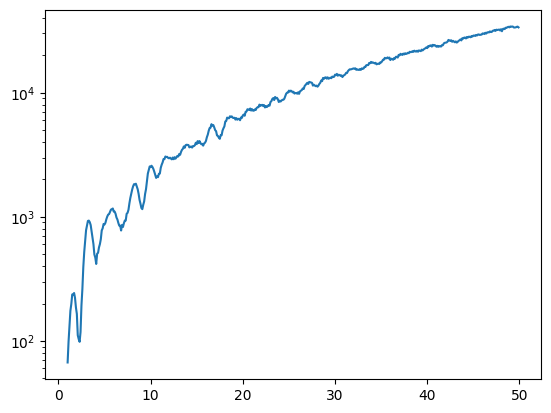

In [126]:
plt.yscale("log")
# plt.xscale("log")
plt.plot(droplet_sizes*10**6,scat_irr)

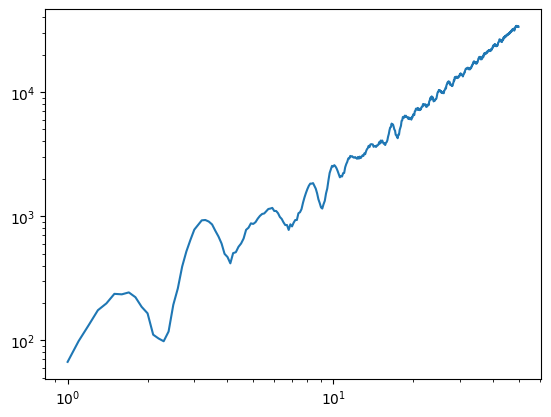

In [127]:
plt.yscale("log")
plt.xscale("log")
plt.plot(droplet_sizes*10**6,scat_irr)

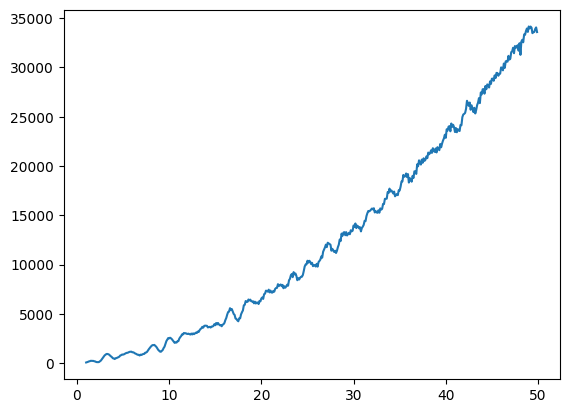

In [128]:
# plt.yscale("log")
# plt.xscale("log")
plt.plot(droplet_sizes*10**6,scat_irr)

BCP response curve

In [119]:
theta1_deg, theta2_deg  = 144, 156 # BCP
wavelength = 658e-9 # BCP
min_um, max_um, step = 1, 50, 0.1
deg_step = 0.5

theta = np.arange(0, np.pi, np.radians(deg_step))
droplet_sizes = np.arange(min_um*10**-6, max_um*10**-6, step*10**-6) 
droplet_x_iter = map(lambda d: np.array([x_size_param(d, wavelength)]), droplet_sizes)
droplet_x = list(deepcopy(droplet_x_iter))
scat_irr_iter = map(lambda x: solid_angle_scattered_irradiance(x, theta, np.radians(theta1_deg), np.radians(theta2_deg)), droplet_x)
scat_irr = list(scat_irr_iter)

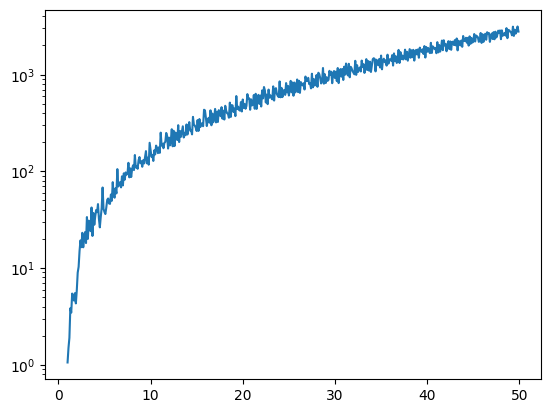

In [120]:
plt.yscale("log")
# plt.xscale("log")
plt.plot(droplet_sizes*10**6,scat_irr)

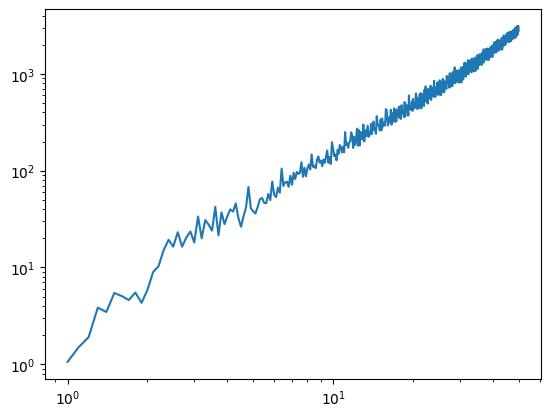

In [121]:
plt.yscale("log")
plt.xscale("log")
plt.plot(droplet_sizes*10**6,scat_irr)

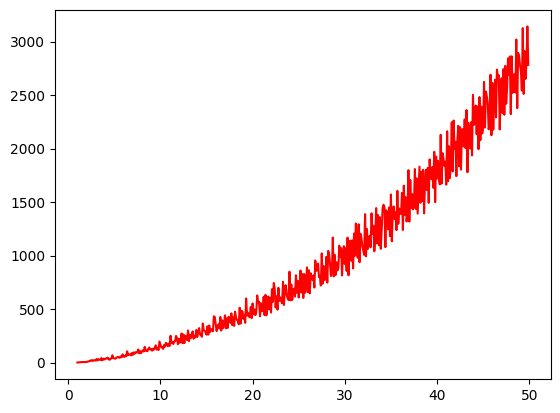

In [122]:
# plt.yscale("log")
# plt.xscale("log")
plt.plot(droplet_sizes*10**6,scat_irr, color='red')

In [135]:
theta1_deg, theta2_deg  = 144, 156 # BCP
wavelength = 658e-9 # BCP
min_um, max_um, step = 5, 20, 0.2
deg_step = 0.5

theta = np.arange(0, np.pi, np.radians(deg_step))
droplet_sizes = np.arange(min_um*10**-6, max_um*10**-6, step*10**-6) 
droplet_x_iter = map(lambda d: np.array([x_size_param(d, wavelength)]), droplet_sizes)
droplet_x = list(deepcopy(droplet_x_iter))
scat_irr_iter = map(lambda x: solid_angle_scattered_irradiance(x, theta, np.radians(theta1_deg), np.radians(theta2_deg)), droplet_x)
scat_irr = list(scat_irr_iter)

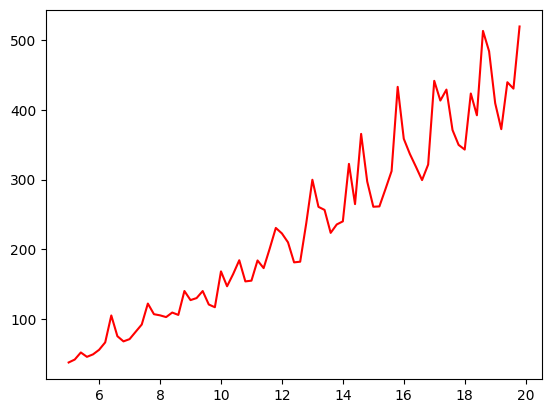

In [136]:
plt.plot(droplet_sizes*10**6,scat_irr, color='red')

multiple wavelengths

In [130]:
theta1_deg, theta2_deg  = 144, 156 # BCP
min_um, max_um, step = 1, 50, 0.1
deg_step = 1

theta = np.arange(0, np.pi, np.radians(deg_step))
droplet_sizes = np.arange(min_um*10**-6, max_um*10**-6, step*10**-6) 

# red
wavelength = 635e-9 
droplet_x_iter = map(lambda d: np.array([x_size_param(d, wavelength)]), droplet_sizes)
droplet_x_red = list(deepcopy(droplet_x_iter))
scat_irr_iter = map(lambda x: solid_angle_scattered_irradiance(x, theta, np.radians(theta1_deg), np.radians(theta2_deg)), droplet_x_red)
scat_irr_red = list(scat_irr_iter)

# green
wavelength = 520e-9 
droplet_x_iter = map(lambda d: np.array([x_size_param(d, wavelength)]), droplet_sizes)
droplet_x_green = list(deepcopy(droplet_x_iter))
scat_irr_iter = map(lambda x: solid_angle_scattered_irradiance(x, theta, np.radians(theta1_deg), np.radians(theta2_deg)), droplet_x_green)
scat_irr_green = list(scat_irr_iter)

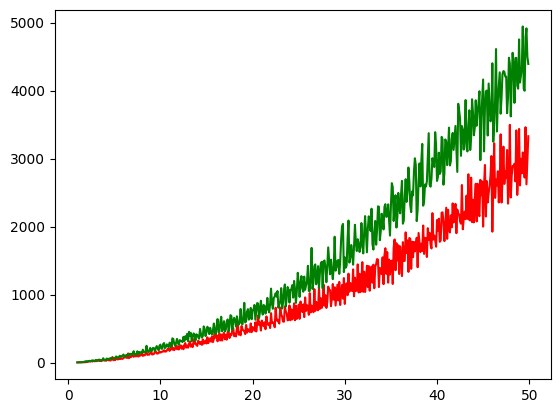

In [131]:
plt.plot(droplet_sizes*10**6,scat_irr_red, color='red')
plt.plot(droplet_sizes*10**6,scat_irr_green, color='green')

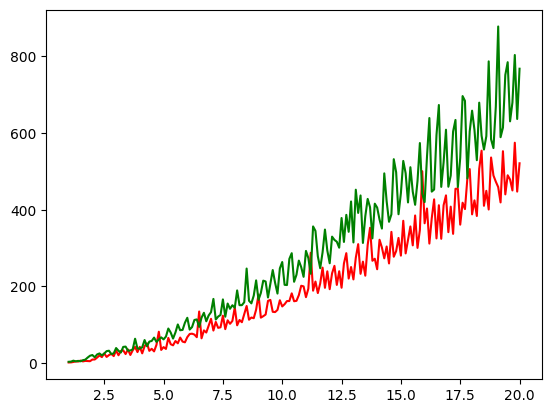

In [132]:
cut=191
plt.plot(droplet_sizes[:cut]*10**6,scat_irr_red[:cut], color='red')
plt.plot(droplet_sizes[:cut]*10**6,scat_irr_green[:cut], color='green')

In [139]:
theta1_deg, theta2_deg  = 144, 156 # BCP
min_um, max_um, step = 1, 20, 0.05
deg_step = 0.5

theta = np.arange(0, np.pi, np.radians(deg_step))
droplet_sizes = np.arange(min_um*10**-6, max_um*10**-6, step*10**-6) 

# red
wavelength = 635e-9 
droplet_x_iter = map(lambda d: np.array([x_size_param(d, wavelength)]), droplet_sizes)
droplet_x_red = list(deepcopy(droplet_x_iter))
scat_irr_iter = map(lambda x: solid_angle_scattered_irradiance(x, theta, np.radians(theta1_deg), np.radians(theta2_deg)), droplet_x_red)
scat_irr_red = list(scat_irr_iter)

# green
wavelength = 520e-9 
droplet_x_iter = map(lambda d: np.array([x_size_param(d, wavelength)]), droplet_sizes)
droplet_x_green = list(deepcopy(droplet_x_iter))
scat_irr_iter = map(lambda x: solid_angle_scattered_irradiance(x, theta, np.radians(theta1_deg), np.radians(theta2_deg)), droplet_x_green)
scat_irr_green = list(scat_irr_iter)

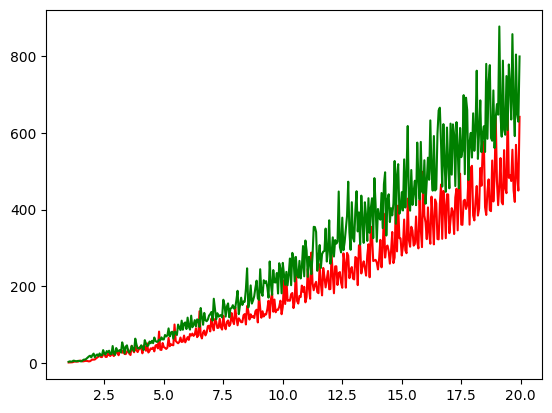

In [140]:
plt.plot(droplet_sizes*10**6,scat_irr_red, color='red')
plt.plot(droplet_sizes*10**6,scat_irr_green, color='green')